In [1]:
#import some useful stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path

# Analysis of the open availability of NASA publications

Determine the number of publicatins being produced by NASA by querying two different resources

See Michelson, R, Paseka, R, Crawford, S. 2024. Monitoring Implementation of the NASA Science Mission Directorate Scientific Information Policy for NASA’s Research Opportunities for Earth and Space Science. OSF Registries. https://doi.org/10.17605/OSF.IO/43U8W 

In [2]:
#read in the full CHORUS dataset - this file is downloaded from https://dashboard.chorusaccess.org/nasa#/summary
mydir = "./"
myfile = "all_chorus.csv"
fileloc = Path(mydir + myfile)
full_chorus = pd.read_csv(fileloc)

In [3]:
#take a quick look at the dataframe, see if that worked
full_chorus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51817 entries, 0 to 51816
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   DOI                                    51817 non-null  object
 1   Publisher                              51817 non-null  object
 2   Funders                                51793 non-null  object
 3   Funder Id                              51793 non-null  object
 4   RoRID (Funder)                         51222 non-null  object
 5   Author(s)                              51805 non-null  object
 6   Article Title                          51817 non-null  object
 7   Journal Name                           50046 non-null  object
 8   Online Publication Date                36384 non-null  object
 9   Print Publication Date                 43112 non-null  object
 10  Last Audited On                        38790 non-null  object
 11  Publicly Access

In [4]:
#make the pub dates into datetime objects
full_chorus["Print Publication Date"] = pd.to_datetime(full_chorus["Print Publication Date"])
#give the date column a shorter name for ease of calling
date_column = full_chorus["Print Publication Date"]

/var/folders/cl/k6ljw4bx7bn7qw3pxh7tzks40000gp/T/ipykernel_31792/4174358415.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_chorus["Print Publication Date"] = pd.to_datetime(full_chorus["Print Publication Date"])


In [5]:
pubs_2023 = full_chorus[full_chorus['Print Publication Date'].dt.year == 2023]

In [6]:
# limit to only journal articles
pubs_2023 = pubs_2023[pubs_2023["Type"]=="journal-article"] 

## Analyze 2023 Data Set

In [7]:
total = len(pubs_2023)
print(total)

4710


In [8]:
pubs_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4710 entries, 0 to 51792
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   DOI                                    4710 non-null   object        
 1   Publisher                              4710 non-null   object        
 2   Funders                                4710 non-null   object        
 3   Funder Id                              4710 non-null   object        
 4   RoRID (Funder)                         4676 non-null   object        
 5   Author(s)                              4710 non-null   object        
 6   Article Title                          4710 non-null   object        
 7   Journal Name                           4710 non-null   object        
 8   Online Publication Date                3557 non-null   object        
 9   Print Publication Date                 4710 non-null   datetime64[n

In [9]:
#investigate "Publicly Accessible On Publusher Site" column
npub_site = pubs_2023["Publicly Accessible On Publisher Site"].count()

print("{frac} out of {total} papers (or {percent}% of papers) are publicly available on their publisher's website".format(frac = npub_site, total=total, percent=round(100*(npub_site/total),2)))

2233 out of 4710 papers (or 47.41% of papers) are publicly available on their publisher's website


In [10]:
#investigate "CHORUS Verified OA" column
unknown = (pubs_2023["CHORUS Verified OA"] == "Unknown").sum()
yes = (pubs_2023["CHORUS Verified OA"] == "Yes").sum()
no = (pubs_2023["CHORUS Verified OA"] == "No").sum()

        
data = [["Verified OA", yes], ["Not verified OA", no], ["Unknown status", unknown]]
df = pd.DataFrame(data, columns=['Status', 'Count'])
df

,Status,Count
0,Verified OA,2266
1,Not verified OA,1659
2,Unknown status,785


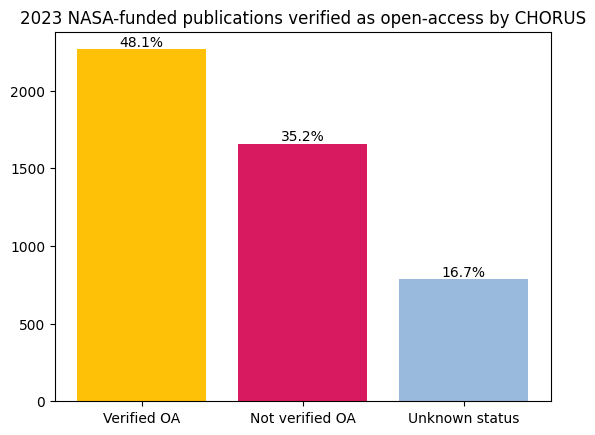

In [11]:
#calculate percents off of the above df and make a little plot for funsies
unk_percent = round(100*unknown/total,1)
yes_percent = round(100*yes/total,1)
no_percent = round(100*no/total,1)

plt.title("2023 NASA-funded publications verified as open-access by CHORUS")
plt.bar_label(plt.bar(df["Status"], df["Count"], color=['#FFC107', '#D81B60', '#99BADD']),[f"{yes_percent}%", f"{no_percent}%", f"{unk_percent}%"])
#plt.show()
plt.savefig("openaccess_chorus.jpg")

## Read in SciX data

This file was created based on a query for 2023 NASA publications from https://scixplorer.org.  It is a composite file made from multiple downloads from the service.  

The SciX query used was: full:"supported by NASA" year:"2023" property:"open access" property:refereed.

In [12]:
scix = pd.read_csv("all_scix.csv")

In [13]:
len(scix)

3875

In [14]:
intersection = pd.merge(pubs_2023, scix, on=['DOI', 'DOI'], how='outer', indicator=True)


In [15]:
len(intersection)

7223

In [16]:
intersection["_merge"].unique()

['left_only', 'right_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [17]:
for x in intersection["_merge"].unique(): 
    print(x, (intersection["_merge"]==x).sum())


left_only 3348
right_only 2513
both 1362
